## Univariate Analysis for Forecasting Tractor Sale 

### Import Packages

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
import sys

### Read Data

In [3]:
trac_sales=pd.read_csv('C:/Users/shamebanerjee/Desktop/Personal_Stuff_1/Analytics/ML/Class 11 & 12/0. Tractor Sales forecasting - Class Exercise/Tractor-Sales.csv')

### Data Preparation

In [4]:
# No missing values 
trac_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
trac_sales.head()

Month-Year  Number of Tractor Sold
0     Jan-03                     141
1     Feb-03                     157
2     Mar-03                     185
3     Apr-03                     199
4     May-03                     203

In [17]:
# Renaming columns as per INC rules
# Converting Month-Year to Date format
# Converting Data to a time series data
# Adding Month and Year Field

trac_sales.columns=['Month_Year','No_Tractors_Sold']
trac_sales.loc[:,'Month_Year']=pd.to_datetime(trac_sales.Month_Year,format='%b-%y')
trac_sales.set_index(trac_sales.Month_Year,inplace=True)
trac_sales['Month']=trac_sales.Month_Year.dt.month
trac_sales['Year']=trac_sales.Month_Year.dt.year

In [18]:
trac_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2003-01-01 to 2014-12-01
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month_Year        144 non-null    datetime64[ns]
 1   No_Tractors_Sold  144 non-null    int64         
 2   Month             144 non-null    int64         
 3   Year              144 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.6 KB


In [24]:
#time series data

ts=trac_sales.No_Tractors_Sold

### Exploratory Data Analysis (EDA)

In [19]:
pd.pivot_table(data=trac_sales,index='Month',columns='Year',values='No_Tractors_Sold')

Year   2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014
Month                                                                        
1       141   145   183   215   247   257   305   358   397   428   454   525
2       157   168   200   239   261   250   310   368   400   423   455   520
3       185   197   249   270   330   329   374   444   498   507   568   587
4       199   208   251   279   362   350   414   482   536   536   610   710
5       203   210   289   307   385   393   454   534   596   610   706   793
6       189   209   249   305   340   370   441   524   591   609   661   749
7       207   238   279   322   370   423   510   578   651   687   767   871
8       207   238   279   339   381   410   486   567   654   707   783   848
9       171   199   232   263   299   326   393   447   509   509   583   640
10      150   168   204   241   266   289   345   386   437   452   513   581
11      138   152   194   229   239   270   315   360   406   412   481   519
12      165   196   232   272   281   321   389   428   470   472   567   605

<AxesSubplot:xlabel='Month'>

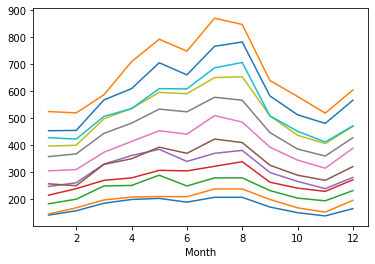

In [22]:
# We see there is a seasonality in the data

pd.pivot_table(data=trac_sales,index='Month',columns='Year',values='No_Tractors_Sold').plot(legend=False)

In [21]:
pd.pivot_table(data=trac_sales,index='Year',columns='Month',values='No_Tractors_Sold')

Month   1    2    3    4    5    6    7    8    9    10   11   12
Year                                                             
2003   141  157  185  199  203  189  207  207  171  150  138  165
2004   145  168  197  208  210  209  238  238  199  168  152  196
2005   183  200  249  251  289  249  279  279  232  204  194  232
2006   215  239  270  279  307  305  322  339  263  241  229  272
2007   247  261  330  362  385  340  370  381  299  266  239  281
2008   257  250  329  350  393  370  423  410  326  289  270  321
2009   305  310  374  414  454  441  510  486  393  345  315  389
2010   358  368  444  482  534  524  578  567  447  386  360  428
2011   397  400  498  536  596  591  651  654  509  437  406  470
2012   428  423  507  536  610  609  687  707  509  452  412  472
2013   454  455  568  610  706  661  767  783  583  513  481  567
2014   525  520  587  710  793  749  871  848  640  581  519  605

<AxesSubplot:xlabel='Year'>

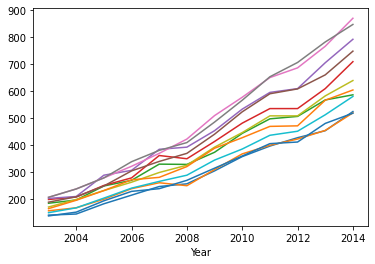

In [23]:
#We see a positive and linear trend

pd.pivot_table(data=trac_sales,index='Year',columns='Month',values='No_Tractors_Sold').plot(legend=False)

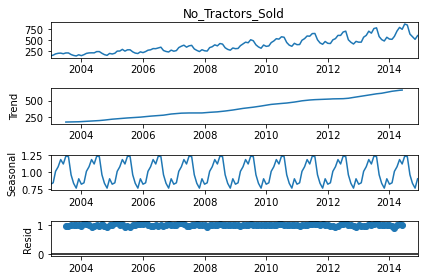

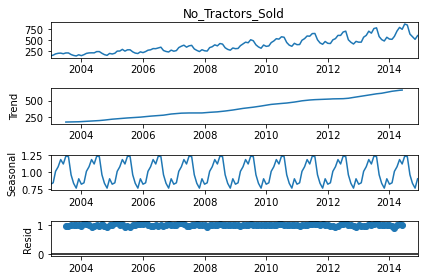

In [31]:
# Verify Seasonality and Trend

decomp=seasonal_decompose(ts,model='multiplicative')
decomp.plot()

In [33]:
pd.concat([decomp.observed,decomp.trend,decomp.seasonal,decomp.resid],axis=1).head(10)

No_Tractors_Sold       trend  seasonal     resid
Month_Year                                                  
2003-01-01             141.0         NaN  0.823333       NaN
2003-02-01             157.0         NaN  0.843859       NaN
2003-03-01             185.0         NaN  1.012370       NaN
2003-04-01             199.0         NaN  1.080556       NaN
2003-05-01             203.0         NaN  1.185793       NaN
2003-06-01             189.0         NaN  1.120913       NaN
2003-07-01             207.0  176.166667  1.236024  0.950648
2003-08-01             207.0  176.791667  1.230135  0.951822
2003-09-01             171.0  177.750000  0.961964  1.000064
2003-10-01             150.0  178.625000  0.836410  1.003991

### 1. ETS Models (Exponential Smoothing)

In [222]:
# Find the best parameter

def exp_sm (timeseries,val_split_date,alpha=[None],beta=[None],gamma=[None],trend=None,seasonal=None,period=None,verbose=False):
    
    best_params=[]
    actual=timeseries[val_split_date:]
    
    for a in alpha:
        for b in beta:
            for g in gamma:
                
                if(verbose==True):
                    
                    print('checking for' ,'alpha :', a , ' beta : ', b , ' and gamma : ', g)
                    
                    model=ExponentialSmoothing(timeseries,trend=trend,seasonal=seasonal,seasonal_periods=period)
                    model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
                    f_cast=model.predict(model.params,start=actual.index[0])
                    score=np.float64(mean_absolute_percentage_error(actual,f_cast))
                    
                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mape': score})
                    
    return min(best_params,key= lambda x: x['mape'])

In [223]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [224]:
exp_sm(ts, val_split_date ='2014-07-01' , alpha=alpha, beta=beta, gamma=gamma, 
              trend='mul', seasonal='mul', period=12, verbose=True)

checking for alpha : 0.1  beta :  0.1  and gamma :  0.1
checking for alpha : 0.1  beta :  0.1  and gamma :  0.2
checking for alpha : 0.1  beta :  0.1  and gamma :  0.3
checking for alpha : 0.1  beta :  0.1  and gamma :  0.4
checking for alpha : 0.1  beta :  0.1  and gamma :  0.5
checking for alpha : 0.1  beta :  0.1  and gamma :  0.6
checking for alpha : 0.1  beta :  0.1  and gamma :  0.7
checking for alpha : 0.1  beta :  0.1  and gamma :  0.8
checking for alpha : 0.1  beta :  0.1  and gamma :  0.9
checking for alpha : 0.1  beta :  0.2  and gamma :  0.1
checking for alpha : 0.1  beta :  0.2  and gamma :  0.2
checking for alpha : 0.1  beta :  0.2  and gamma :  0.3
checking for alpha : 0.1  beta :  0.2  and gamma :  0.4
checking for alpha : 0.1  beta :  0.2  and gamma :  0.5
checking for alpha : 0.1  beta :  0.2  and gamma :  0.6
checking for alpha : 0.1  beta :  0.2  and gamma :  0.7
checking for alpha : 0.1  beta :  0.2  and gamma :  0.8
checking for alpha : 0.1  beta :  0.2  and gamma

{'alpha': 0.1, 'beta': 0.6, 'gamma': 0.2, 'mape': 0.012363669062930313}

In [82]:
#Build Model with Best Parameters

expsm_model=ExponentialSmoothing(ts,trend='mul',seasonal='mul',seasonal_periods=12).fit(smoothing_level=0.1,smoothing_slope=0.6,smoothing_seasonal=0.2)
print(expsm_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:         No_Tractors_Sold   No. Observations:                  144
Model:             ExponentialSmoothing   SSE                          62690.798
Optimized:                         True   AIC                            906.967
Trend:                   Multiplicative   BIC                            954.484
Seasonal:                Multiplicative   AICC                           912.439
Seasonal Periods:                    12   Date:                 Thu, 01 Dec 2022
Box-Cox:                          False   Time:                         15:00:44
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend          

C:\Users\shamebanerjee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shamebanerjee\AppData\Local\Temp\ipykernel_23248\4069927249.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  expsm_model=ExponentialSmoothing(ts,trend='mul',seasonal='mul',seasonal_periods=12).fit(smoothing_level=0.1,smoothing_slope=0.6,smoothing_seasonal=0.2)
C:\Users\shamebanerjee\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


### Check Accuracy of the Model

In [89]:
#Train Test Split
train=ts[:'2014-06-01']
test=ts['2014-07-01':]

In [91]:
#Check Accuracy on Test

expsm_model=ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit(smoothing_level=0.1,smoothing_slope=0.6,smoothing_seasonal=0.2)
pred_test=expsm_model.forecast(6)
print('Mape on Test' ,mean_absolute_percentage_error(test,pred_test))

Mape on Test 0.01421317895322967


C:\Users\shamebanerjee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shamebanerjee\AppData\Local\Temp\ipykernel_23248\2457917123.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  expsm_model=ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit(smoothing_level=0.1,smoothing_slope=0.6,smoothing_seasonal=0.2)


In [92]:
#Check Accuracy on Train

pred_train=expsm_model.fittedvalues[:'2014-06-01']
print('Mape on Train' ,mean_absolute_percentage_error(train,pred_train))

Mape on Train 0.04320275543695557


### Final Forecast

In [93]:
expsm_model=ExponentialSmoothing(ts,trend='mul',seasonal='mul',seasonal_periods=12).fit(smoothing_level=0.1,smoothing_slope=0.6,smoothing_seasonal=0.2)
expsm_model.forecast(12)

C:\Users\shamebanerjee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shamebanerjee\AppData\Local\Temp\ipykernel_23248\1352315762.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  expsm_model=ExponentialSmoothing(ts,trend='mul',seasonal='mul',seasonal_periods=12).fit(smoothing_level=0.1,smoothing_slope=0.6,smoothing_seasonal=0.2)
C:\Users\shamebanerjee\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


2015-01-01    560.654820
2015-02-01    566.096639
2015-03-01    682.240286
2015-04-01    750.245364
2015-05-01    838.124970
2015-06-01    800.136033
2015-07-01    903.658437
2015-08-01    896.287852
2015-09-01    680.453529
2015-10-01    598.145726
2015-11-01    546.228801
2015-12-01    640.307422
Freq: MS, dtype: float64

### 2. SARIMA

#### Box Jenkins Process to Find approx values of p,d,q

In [96]:
### We need to ensure series is stationary

adfuller(ts)

(1.1088250591467386,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [98]:
### Apply log transformation

ln_ts=np.log(ts) # we are going to pass this input in the model
adfuller(ln_ts)

(-1.7324716814049705,
 0.4144644927491048,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -446.8186692532702)

In [101]:
ln_tsdiff2=np.log(ts).diff(2).dropna()
adfuller(ln_tsdiff2) # Here d=2

(-3.200721566232413,
 0.019942950105460676,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -434.9038941451596)

In [102]:
#Check for Autocorrelation using ACF test

smt.acf(ln_tsdiff2) # Here we see there is autocorrelaton with different lags

array([ 1.        ,  0.54194956,  0.0099027 , -0.06510041, -0.08202942,
       -0.44195862, -0.78692599, -0.4636863 , -0.09665969, -0.0601077 ,
        0.00524666,  0.4785164 ,  0.88622673,  0.49475938,  0.0267353 ,
       -0.04486359, -0.05689867, -0.38465263, -0.72315241, -0.45001557,
       -0.1071293 , -0.06157504])

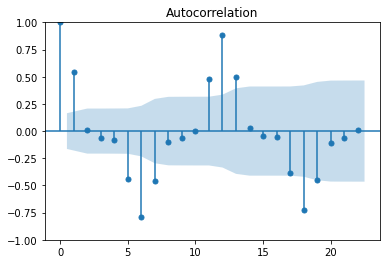

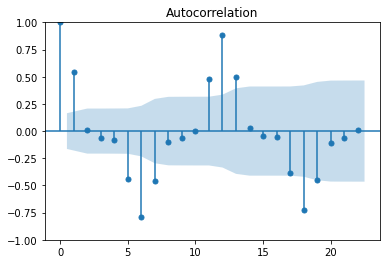

In [103]:
# Series is seasonal - SARIMA Model
# q value based on ACF plot
# value of q = 1, Q=1
# q value founded based after which value of lag, the correlations becoming zero or crossing zero (positive to negative or negative to positive)
smt.graphics.plot_acf(ln_tsdiff2) 

In [104]:
#Find PACF

smt.pacf(ln_tsdiff2)

array([ 1.        ,  0.54579317, -0.40997294,  0.25599259, -0.29289753,
       -0.55194295, -0.57338063,  0.21871134, -0.70042364, -0.27488574,
       -0.60848346,  0.84191497, -0.58487144,  1.25095262,  4.13092129,
       -0.7820926 ,  0.35404889, -0.33130535,  0.0405514 , -0.2878715 ,
       -0.0863849 , -0.44851232])

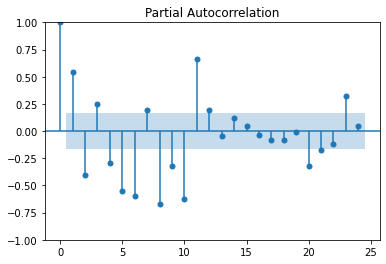

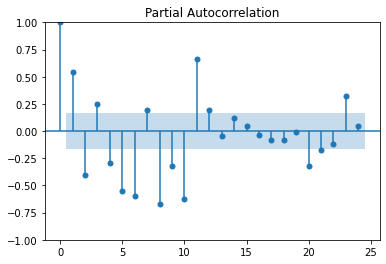

In [106]:
#Find p value based on PACF plot
# value of p = 1, P=1
# p value founded based after which value of lag, the correlations becoming zero or crossing zero (positive to negative or negative to positive)

smt.graphics.plot_pacf(ln_tsdiff2,lags=24,method='ols')

### Train Test Split & Applying SARIMA

In [108]:
train=ln_ts[:'2014-06-01']
test=ln_ts['2014-07-01':]

In [109]:
msm=sm.tsa.statespace.SARIMAX(train,order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

C:\Users\shamebanerjee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [110]:
print(msm.summary()) # AIC value should be as low as possible 

                                     SARIMAX Results                                      
Dep. Variable:                   No_Tractors_Sold   No. Observations:                  138
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 222.077
Date:                            Thu, 01 Dec 2022   AIC                           -434.155
Time:                                    16:51:47   BIC                           -420.134
Sample:                                01-01-2003   HQIC                          -428.460
                                     - 06-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3577      0.075     -4.762      0.000      -0.505      -0.211
ma.L1         -1.0000     31.908   

### Predicting values and finding accuracy

In [113]:
#Test Accuracy
f_cast_test=np.exp(msm.forecast(6))

In [114]:
act_test=np.exp(test)

In [115]:
print('mape for test ', mean_absolute_percentage_error(act_test,f_cast_test))

mape for test  0.018290226146835835


In [118]:
#Train Accuracy

pred_train=np.exp(msm.fittedvalues)['2013-07-01':]
act_train=np.exp(train)['2013-07-01':]
print('mape for test ', mean_absolute_percentage_error(act_train,pred_train))


mape for test  0.029191937238751353


#### Iterative method to find the best values of p,d,q

In [145]:
def auto_sarima(timeseries,regressors=None,p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):
    
    # Generate all different combinations of p, d and q triplets
    pdq=list(itertools.product(p,d,q))
    
    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(P,D,Q))]
    
    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            
            temp_model=sm.tsa.statespace.SARIMAX(endog=timeseries,exog=regressors,order=param,seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                 enforce_invertibility=False)
            
            temp_results = temp_model.fit()
            
            print("SARIMAX{}x{} - AIC:{}".format(param, param_seasonal, temp_results.aic))
            
            if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                    
    
    print("Best SARIMAX{}x{} model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [146]:
best_results=auto_sarima(ln_ts,p=range(0,3),d=range(2, 3),q=range(0,3),P=range(0,3),D=range(0,2),Q=range(0,3))

pdq  [(0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)] seasonal_pdq [(0, 0, 0, 12), (0, 0, 1, 12), (0, 0, 2, 12), (0, 1, 0, 12), (0, 1, 1, 12), (0, 1, 2, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 0, 2, 12), (1, 1, 0, 12), (1, 1, 1, 12), (1, 1, 2, 12), (2, 0, 0, 12), (2, 0, 1, 12), (2, 0, 2, 12), (2, 1, 0, 12), (2, 1, 1, 12), (2, 1, 2, 12)]
SARIMAX(0, 2, 0)x(0, 0, 0, 12) - AIC:-94.33654573330656
SARIMAX(0, 2, 0)x(0, 0, 1, 12) - AIC:-179.84996251690023
SARIMAX(0, 2, 0)x(0, 0, 2, 12) - AIC:-199.45343390439098
SARIMAX(0, 2, 0)x(0, 1, 0, 12) - AIC:-299.10117606786304
SARIMAX(0, 2, 0)x(0, 1, 1, 12) - AIC:-300.63982644687036
SARIMAX(0, 2, 0)x(0, 1, 2, 12) - AIC:-283.99001021446907
SARIMAX(0, 2, 0)x(1, 0, 0, 12) - AIC:-306.07485736744127
SARIMAX(0, 2, 0)x(1, 0, 1, 12) - AIC:-330.82169527359474
SARIMAX(0, 2, 0)x(1, 0, 2, 12) - AIC:-293.4298016561651
SARIMAX(0, 2, 0)x(1, 1, 0, 12) - AIC:-287.81762902402386
SARIMAX(0, 2, 0)x(1, 1, 1, 12) - AIC:-297.4

In [136]:
msm_1 = sm.tsa.statespace.SARIMAX(train, order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print (msm_1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                   No_Tractors_Sold   No. Observations:                  138
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 222.077
Date:                            Thu, 01 Dec 2022   AIC                           -434.155
Time:                                    17:38:21   BIC                           -420.134
Sample:                                01-01-2003   HQIC                          -428.460
                                     - 06-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3577      0.075     -4.762      0.000      -0.505      -0.211
ma.L1         -1.0000     31.908   

In [ ]:
# Since the p,d,q and P,D,Q values are same the accuracy will be the same as before

In [137]:
model = sm.tsa.statespace.SARIMAX(ln_ts, order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [138]:
f_cast = np.exp(model.forecast(12))

In [139]:
ts

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: No_Tractors_Sold, Length: 144, dtype: int64

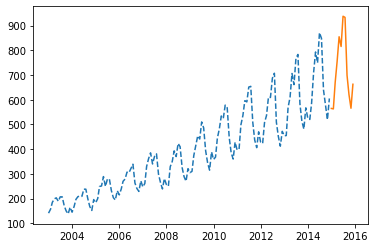

In [148]:
plt.plot(ts, '--', label='obs')
plt.plot(f_cast, '-', label=f_cast)

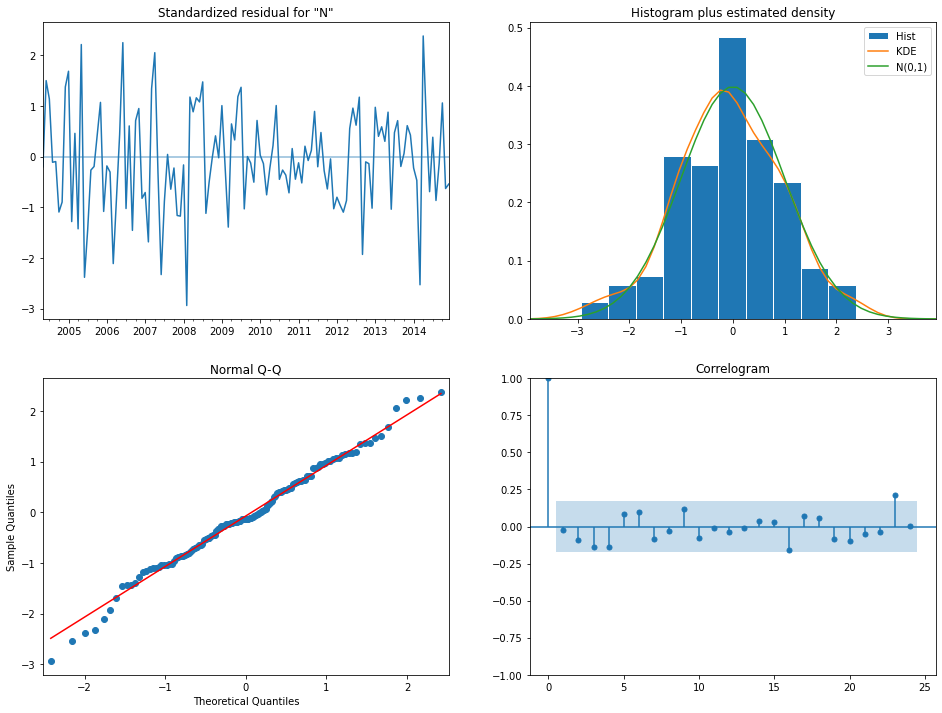

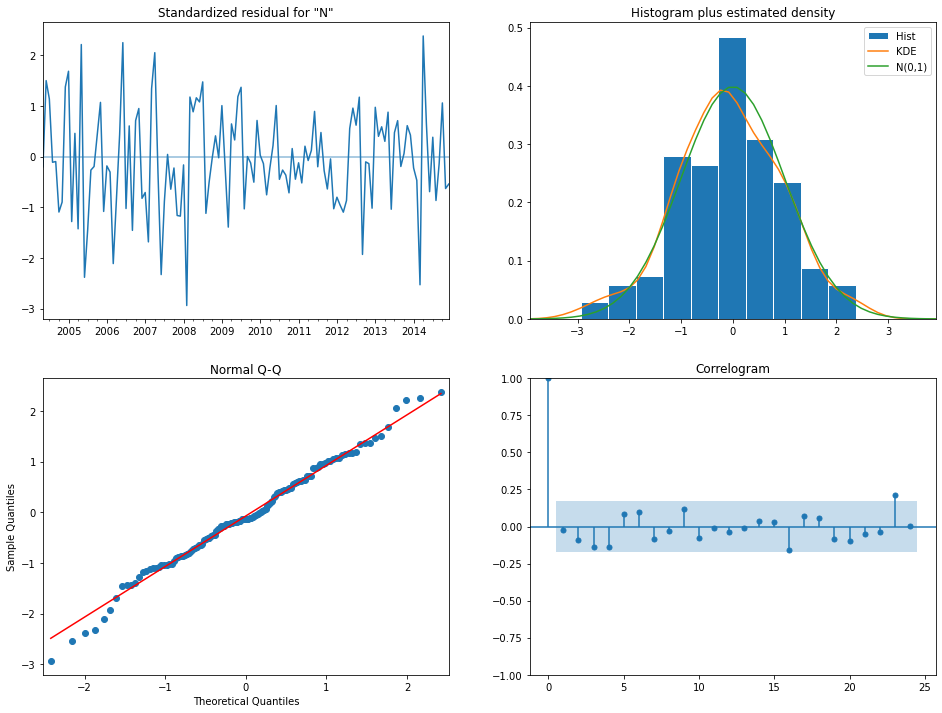

In [150]:
model.plot_diagnostics(lags=24, figsize=(16,12))

#Errors should follow normal distribution
#ACF of Errors - Error series should be white noise/random walk- There is no auto correlation among errors

## Multivariate Analysis for Forecasting Sales with presence of Marketing Spend

### Read Data

In [151]:
tract_sales=pd.read_csv('C:/Users/shamebanerjee/Desktop/Personal_Stuff_1/Analytics/ML/Class 11 & 12/0. Tractor Sales forecasting - Class Exercise/Sales-and-Marketing.csv')

In [152]:
tract_sales.head()

Time Period  Sales  Marketing Expense
0      Jan-11    397             486.64
1      Feb-11    400             501.80
2      Mar-11    498             437.09
3      Apr-11    536             565.16
4      May-11    596             744.15

In [153]:
tract_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time Period        48 non-null     object 
 1   Sales              48 non-null     int64  
 2   Marketing Expense  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


### Data Preparation

In [154]:
# Naming columns as per INC convention

tract_sales.columns=['Time_period','Sales','Marketing_Expense']

In [155]:
# Changing Time_period to date format

tract_sales['Time_period']=pd.to_datetime(tract_sales.Time_period,format='%b-%y')

In [156]:
# Converting to Time Series

tract_sales.set_index(tract_sales.Time_period,inplace=True)

In [157]:
tract_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-01 to 2014-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time_period        48 non-null     datetime64[ns]
 1   Sales              48 non-null     int64         
 2   Marketing_Expense  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.5 KB


In [158]:
tract_sales.head()

Time_period  Sales  Marketing_Expense
Time_period                                      
2011-01-01   2011-01-01    397             486.64
2011-02-01   2011-02-01    400             501.80
2011-03-01   2011-03-01    498             437.09
2011-04-01   2011-04-01    536             565.16
2011-05-01   2011-05-01    596             744.15

In [159]:
tract_sales['Marketing_Expense_lag1']=tract_sales.Marketing_Expense.shift(1)
tract_sales['Marketing_Expense_lag2']=tract_sales.Marketing_Expense.shift(2)
tract_sales['Marketing_Expense_lag3']=tract_sales.Marketing_Expense.shift(3)
tract_sales['Marketing_Expense_lag4']=tract_sales.Marketing_Expense.shift(4)

In [161]:
tract_sales.head()

Time_period  Sales  Marketing_Expense  Marketing_Expense_lag1  \
Time_period                                                                 
2011-01-01   2011-01-01    397             486.64                     NaN   
2011-02-01   2011-02-01    400             501.80                  486.64   
2011-03-01   2011-03-01    498             437.09                  501.80   
2011-04-01   2011-04-01    536             565.16                  437.09   
2011-05-01   2011-05-01    596             744.15                  565.16   

             Marketing_Expense_lag2  Marketing_Expense_lag3  \
Time_period                                                   
2011-01-01                      NaN                     NaN   
2011-02-01                      NaN                     NaN   
2011-03-01                   486.64                     NaN   
2011-04-01                   501.80                  486.64   
2011-05-01                   437.09                  501.80   

             Marketing_Expense_lag4  
Time_period                          
2011-01-01                      NaN  
2011-02-01                      NaN  
2011-03-01                      NaN  
2011-04-01                      NaN  
2011-05-01                   486.64

### Finding out p,d,q values

In [170]:
#d value is 1
adfuller(tract_sales.Sales.diff(1).dropna())

(-7.015650419745931,
 6.743731035461859e-10,
 10,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 361.3167752934367)

In [171]:
sales_diff=tract_sales.Sales.diff(1).dropna()

In [172]:
# Finding q

smt.acf(sales_diff)

array([ 1.        ,  0.17549673, -0.04814904, -0.08589742, -0.07243906,
       -0.11425167, -0.63585449, -0.11059435, -0.03395833,  0.00137579,
       -0.07480335,  0.14085225,  0.71648626,  0.12280792, -0.00109047,
       -0.11623167, -0.04045406])

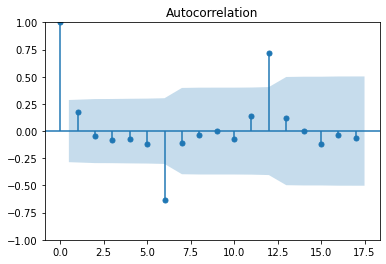

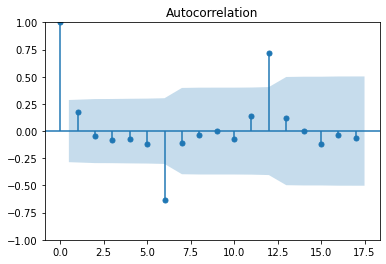

In [173]:
#q=1
smt.graphics.plot_acf(sales_diff)

In [174]:
#Finding p

smt.pacf(sales_diff)

array([ 1.        ,  0.17931187, -0.08518053, -0.06941397, -0.05545279,
       -0.11873155, -0.74407054,  0.09021223, -0.41437682, -0.3656085 ,
       -0.93651796, -3.59309054,  1.04469021, -0.39214318,  0.35569745,
        0.92428104,  2.35989644])

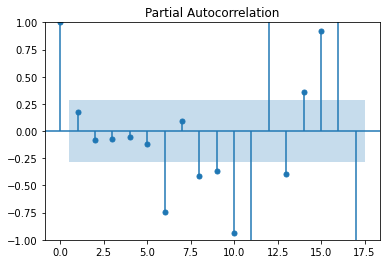

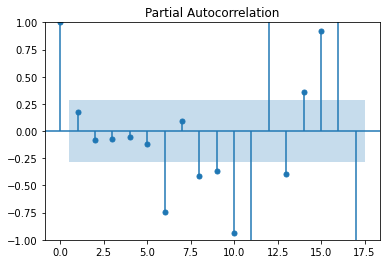

In [175]:
#p=1
smt.graphics.plot_pacf(sales_diff)

### Model Preparation (Sarimax) based on p,d,q values obtained from Box Jenkins

In [200]:
# From Box Jenkins Method we found that p=1,q=1,q=1
# As data is seasonal (proved earlier) we use P,D,Q values. Here Let P=1,D=0,Q=1,Period=12
# Split the X and Y components

X=tract_sales['2011-05-01':][['Marketing_Expense','Marketing_Expense_lag1','Marketing_Expense_lag2']]
ts_new=tract_sales['2011-05-01':].Sales

In [201]:
tract_sales['2011-05-01':].corr()

Sales  Marketing_Expense  Marketing_Expense_lag1  \
Sales                   1.000000           0.807838                0.585169   
Marketing_Expense       0.807838           1.000000                0.626329   
Marketing_Expense_lag1  0.585169           0.626329                1.000000   
Marketing_Expense_lag2  0.262011           0.380395                0.622385   
Marketing_Expense_lag3 -0.056909           0.140597                0.380459   
Marketing_Expense_lag4 -0.257012          -0.130755                0.145967   

                        Marketing_Expense_lag2  Marketing_Expense_lag3  \
Sales                                 0.262011               -0.056909   
Marketing_Expense                     0.380395                0.140597   
Marketing_Expense_lag1                0.622385                0.380459   
Marketing_Expense_lag2                1.000000                0.625423   
Marketing_Expense_lag3                0.625423                1.000000   
Marketing_Expense_lag4                0.398619                0.634986   

                        Marketing_Expense_lag4  
Sales                                -0.257012  
Marketing_Expense                    -0.130755  
Marketing_Expense_lag1                0.145967  
Marketing_Expense_lag2                0.398619  
Marketing_Expense_lag3                0.634986  
Marketing_Expense_lag4                1.000000

In [202]:
m1=sm.tsa.statespace.SARIMAX(ts_new,exog=X,order=(1,1,1),seasonal_order=(1,0,1,12),enforce_stationarity=False,
    enforce_invertibility=False).fit()

In [203]:
print(m1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   44
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -131.404
Date:                            Fri, 02 Dec 2022   AIC                            278.807
Time:                                    13:03:33   BIC                            289.746
Sample:                                05-01-2011   HQIC                           282.233
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Marketing_Expense          0.0026      0.047      0.055      0.956      -0.089       0.094

### Model Preparation (Sarimax) based on p,d,q values obtained from Iterative approach

In [204]:
best_results_1=auto_sarima(ts_new,X,p=range(0,2),d=range(0, 2),q=range(0,2),P=range(0,2),D=range(0,2),Q=range(0,2))

pdq  [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)] seasonal_pdq [(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]
SARIMAX(0, 0, 0)x(0, 0, 0, 12) - AIC:510.8225704985192
SARIMAX(0, 0, 0)x(0, 0, 1, 12) - AIC:1279.5171729685708
SARIMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:335.19134712979735
SARIMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:211.12457548565268
SARIMAX(0, 0, 0)x(1, 0, 0, 12) - AIC:310.03587577875646
SARIMAX(0, 0, 0)x(1, 0, 1, 12) - AIC:1018.1486820825298
SARIMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:218.41552509113188
SARIMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:204.04968132730372
SARIMAX(0, 0, 1)x(0, 0, 0, 12) - AIC:486.8111334845112
SARIMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:2094.2328682259167
SARIMAX(0, 0, 1)x(0, 1, 0, 12) - AIC:311.2314451249581
SARIMAX(0, 0, 1)x(0, 1, 1, 12) - AIC:195.97038199262568
SARIMAX(0, 0, 1)x(1, 0, 0, 12) - AIC:306.1385210676917
SARIMAX(0, 0, 1)x(1, 0, 1, 12) - AIC:2151.156101

In [205]:
#Best SARIMAX(0, 1, 1)x(1, 1, 1, 12) model - AIC:164

m2=sm.tsa.statespace.SARIMAX(ts_new,X,order=(0,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False,
    enforce_invertibility=False).fit()

In [208]:
act=tract_sales.Sales['2014-01-01':]
pred=m2.fittedvalues['2014-01-01':]

In [209]:
print('mape ',mean_absolute_percentage_error(act,pred))

mape  0.03054385514393024


In [210]:
#Forecast for next one year
Future_mkt_spend = {
    '2015-01-01' : [600, 559.75, 527.60],
    '2015-02-01' : [550, 600, 559.75],
    '2015-03-01' : [700, 550, 600],
    '2015-04-01' : [590, 700, 550],
    '2015-05-01' : [480, 590, 700],
    '2015-06-01' : [520, 480, 590],
    '2015-07-01' : [800, 520, 480],
    '2015-08-01' : [675, 800, 520],
    '2015-09-01' : [820, 675, 800],
    '2015-10-01' : [710, 820, 675],
    '2015-11-01' : [550, 710, 820],
    '2015-12-01' : [590, 550, 710]
}

In [211]:
Future_mkt_spend = pd.DataFrame(Future_mkt_spend).T

In [212]:
Future_mkt_spend

0       1       2
2015-01-01  600.0  559.75  527.60
2015-02-01  550.0  600.00  559.75
2015-03-01  700.0  550.00  600.00
2015-04-01  590.0  700.00  550.00
2015-05-01  480.0  590.00  700.00
2015-06-01  520.0  480.00  590.00
2015-07-01  800.0  520.00  480.00
2015-08-01  675.0  800.00  520.00
2015-09-01  820.0  675.00  800.00
2015-10-01  710.0  820.00  675.00
2015-11-01  550.0  710.00  820.00
2015-12-01  590.0  550.00  710.00

In [213]:
Future_mkt_spend.columns = ['MS', 'MS_Lag1', 'MS_Lag2']

In [214]:
m2.forecast(steps=12, exog = Future_mkt_spend)

2015-01-01    604.798079
2015-02-01    551.878313
2015-03-01    665.576974
2015-04-01    755.278795
2015-05-01    834.242344
2015-06-01    774.968294
2015-07-01    904.230432
2015-08-01    849.943072
2015-09-01    698.316382
2015-10-01    642.821026
2015-11-01    577.849808
2015-12-01    679.104206
Freq: MS, Name: predicted_mean, dtype: float64